<a href="https://colab.research.google.com/github/dani1974/ciencia_dados/blob/main/CDamazonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###**Trabalho final da disciplina**

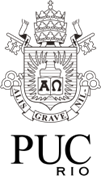


2º semestre 2024


PUC-Rio / Departamento de Engenharia Industrial

Programa de Pós-Graduação em Engenharia de Produção

Disciplina: IND2622 – CIÊNCIA DE DADOS PARA PROCESSOS DE NEGÓCIO

Professora: Fernanda Baião

Aluna : Daniela Lameirão Pinto de Abreu Rosas

#**Previsão do Índice de Qualidade da Água (IQA) na Amazônia Legal utilizando Modelos de Aprendizado de Máquina**

##**1. Definição do Problema**

A Amazônia Legal é uma região que abrange nove estados brasileiros, incluindo Acre (AC), Amapá (AP), Amazonas (AM), Maranhão (MA), Mato Grosso (MT), Pará (PA), Rondônia (RO), Roraima (RR) e Tocantins (TO). Trata-se de uma área de extrema relevância para o equilíbrio ambiental global, sendo reconhecida como uma das maiores reservas de biodiversidade e recursos hídricos do planeta. Entretanto, a qualidade da água em diversas partes dessa região enfrenta ameaças significativas devido a atividades humanas, como mineração, desmatamento, uso inadequado do solo e urbanização desordenada. Esses fatores impactam diretamente os ecossistemas aquáticos e a saúde das populações que dependem dessas águas para sua subsistência e bem-estar.

Diante desse cenário, torna-se essencial compreender os fatores que mais influenciam o Índice de Qualidade da Água (IQA) para priorizar ações de conservação e recuperação dos recursos hídricos da região.

O problema principal a ser enfrentado é identificar quais variáveis físico-químicas têm maior impacto no IQA. A falta de clareza sobre os principais fatores que contribuem para a variação na qualidade da água dificulta a identificação de áreas prioritárias para ações de mitigação e o desenvolvimento de políticas públicas eficazes. Além disso, as diferenças regionais na qualidade da água precisam ser quantificadas para direcionar esforços específicos de gestão e preservação. Nesse contexto, surge a necessidade de um modelo preditivo robusto que, utilizando as variáveis disponíveis, seja capaz de estimar o IQA de forma confiável, facilitando o monitoramento contínuo e subsidiando decisões baseadas em evidências.

O principal objetivo deste projeto é desenvolver um modelo de machine learning para prever o IQA com base nas variáveis físico-químicas disponíveis no dataset. Entre os objetivos secundários, destacam-se a identificação das variáveis que mais influenciam o IQA, permitindo a proposição de ações de controle voltadas à melhoria da qualidade da água, a avaliação das diferenças regionais na qualidade da água entre os estados da Amazônia Legal e a criação de uma ferramenta preditiva que viabilize o monitoramento contínuo e proativo da qualidade hídrica.

**Informações sobre os Atributos: O dataset contém as seguintes variáveis:**

Estado: Identificação do estado onde a amostra foi coletada.

1.  **pH:** Pontuação ponderada do pH (indicador de acidez/alcalinidade da água).
2.  **TempAmostra:** Pontuação ponderada da temperatura da água.
1.  Turbidez: Pontuação ponderada da turbidez (presença de partículas em suspensão).
2.  **OD - Oxigenio dissolvido:** Pontuação ponderada do oxigênio dissolvido (indicador de saúde aquática).
1.  **CondutividadeEspecifica:** Pontuação ponderada da condutividade elétrica específica (indicador de sais dissolvidos).
2.   **IQA - Índice de Qualidade da Água -** Avalia a qualidade geral da água com base em variáveis físico-químicas.












##**2. Carga de Dados**

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
import pandas as pd

# Configurar o pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Carregar os dados de cada estado de qualidade da água
df_aguaAM = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/10200000_QualAguaAM.csv', sep=';', encoding='ISO-8859-1')
df_aguaAM['Estado'] = 'AM'

df_aguaAP = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/12360000_QualAguaAP.csv', sep=';', encoding='ISO-8859-1')
df_aguaAP['Estado'] = 'AP'

df_aguaAC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/12360000_QualAguaacre.csv', sep=';', encoding='ISO-8859-1')
df_aguaAC['Estado'] = 'AC'

df_aguaRO = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/15124009_QualAguaRO.csv', sep=';', encoding='ISO-8859-1')
df_aguaRO['Estado'] = 'RO'

df_aguaMA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/23251000_QualAguaMA.csv', sep=';', encoding='ISO-8859-1')
df_aguaMA['Estado'] = 'MA'

df_aguaMT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/23251000_QualAguaMT.csv', sep=';', encoding='ISO-8859-1')
df_aguaMT['Estado'] = 'MT'

# Exibir as primeiras linhas de cada DataFrame para garantir que foram carregados corretamente
print("Dados de Qualidade da Água - AM:")
display(df_aguaAM.head())

print("\nDados de Qualidade da Água - AP:")
display(df_aguaAP.head())

print("\nDados de Qualidade da Água - AC:")
display(df_aguaAC.head())

print("\nDados de Qualidade da Água - RO:")
display(df_aguaRO.head())

print("\nDados de Qualidade da Água - MA:")
display(df_aguaMA.head())

print("\nDados de Qualidade da Água - MT:")
display(df_aguaMT.head())

Dados de Qualidade da Água - AM:


,EstacaoCodigo,NivelConsistencia,Data,Hora,NumMedicao,PosHorizColeta,PosVertColeta,Choveu,Profundidade,TempAmostra,pH,Turbidez,OD,CondutividadeEspecifica,QualAguaStatus do 1 ao 147,Estado
0,10200000,1,22/05/2024,18:22,2,2,2.0,0.0,"0,4","26,154","6,65","29,61","4,42","18,7",5,AM
1,10200000,1,22/05/2024,18:27,3,3,2.0,0.0,"0,4","26,151","6,61","29,55","4,41","18,7",5,AM
2,10200000,1,22/05/2024,18:15,1,1,2.0,0.0,"0,4","26,152","6,84","28,25","4,46","18,7",5,AM
3,10200000,1,06/02/2024,17:43,1,1,2.0,0.0,"0,4","26,873","6,75","56,42","4,82","19,7",5,AM
4,10200000,1,06/02/2024,18:00,3,3,2.0,0.0,"0,4","26,865","6,27","57,24","4,79","19,6",5,AM



Dados de Qualidade da Água - AP:


,EstacaoCodigo,NivelConsistencia,Data,Hora,NumMedicao,PosHorizColeta,PosVertColeta,Choveu,Profundidade,TempAmostra,pH,Turbidez,OD,CondutividadeEspecifica,QualAguaStatus do 1 ao 147,Estado
0,12360000,1,29/05/2024,17:30,1,3,2.0,0,"0,18","30,695",NaN,"27,31","6,34","567,8",4,AP
1,12360000,1,29/05/2024,17:33,3,1,2.0,0,"0,18","30,482",NaN,"22,07","6,31","579,2",4,AP
2,12360000,1,29/05/2024,17:32,2,2,2.0,0,"0,18","30,667",NaN,"22,57","6,37","568,6",4,AP
3,12360000,1,08/03/2024,07:34,1,3,2.0,0,"0,38","26,424","6,8","505,42","4,24","182,6",5,AP
4,12360000,1,08/03/2024,07:35,2,2,2.0,0,"0,38",NaN,7,"534,96","4,25","180,8",5,AP



Dados de Qualidade da Água - AC:


,EstacaoCodigo,NivelConsistencia,Data,Hora,NumMedicao,PosHorizColeta,PosVertColeta,Choveu,Profundidade,TempAmostra,pH,Turbidez,OD,CondutividadeEspecifica,QualAguaStatus do 1 ao 147,Estado
0,12360000,1,29/05/2024,17:30,1,3,2.0,0,"0,18","30,695",NaN,"27,31","6,34","567,8",4,AC
1,12360000,1,29/05/2024,17:33,3,1,2.0,0,"0,18","30,482",NaN,"22,07","6,31","579,2",4,AC
2,12360000,1,29/05/2024,17:32,2,2,2.0,0,"0,18","30,667",NaN,"22,57","6,37","568,6",4,AC
3,12360000,1,08/03/2024,07:34,1,3,2.0,0,"0,38","26,424","6,8","505,42","4,24","182,6",5,AC
4,12360000,1,08/03/2024,07:35,2,2,2.0,0,"0,38",NaN,7,"534,96","4,25","180,8",5,AC



Dados de Qualidade da Água - RO:


,EstacaoCodigo,NivelConsistencia,Data,Hora,NumMedicao,PosHorizColeta,PosVertColeta,Choveu,Profundidade,TempAmostra,pH,Turbidez,OD,CondutividadeEspecifica,QualAguaStatus do 1 ao 147,Estado
0,15124009,1,05/03/2024,11:58,1.0,2,2,0,"0,2","26,8","6,18","38,26","7,08","28,6",7,RO
1,15124009,1,24/11/2023,11:56,1.0,2,2,1,"0,2","28,79","6,78","17,76","7,28","23,13",8,RO
2,15124009,1,12/09/2023,11:00,1.0,2,2,0,"0,2","28,65","7,26","15,69","7,3","27,5",7,RO
3,15124009,1,20/07/2023,17:43,1.0,2,2,0,"0,2","25,65","7,51","14,54","7,72","28,9",7,RO
4,15124009,1,17/05/2023,09:34,1.0,2,2,0,"0,2","25,77","6,96","23,9","6,96","36,5",7,RO



Dados de Qualidade da Água - MA:


,EstacaoCodigo,NivelConsistencia,Data,Hora,NumMedicao,PosHorizColeta,PosVertColeta,Choveu,Profundidade,TempAmostra,pH,Turbidez,OD,CondutividadeEspecifica,QualAguaStatus do 1 ao 147,Estado
0,23251000,1,22/07/2024,16:44,NaN,3.0,2.0,0,"0,2","25,33","6,44","4,16","7,64","10,6",6,MA
1,23251000,1,16/04/2024,16:43,NaN,3.0,2.0,0,"0,2","26,6","6,67","38,37","6,44","47,9",6,MA
2,23251000,1,15/09/2023,08:50,NaN,2.0,2.0,0,"0,2","26,2","5,27","4,01","7,2","10,3",6,MA
3,23251000,1,25/04/2023,09:10,NaN,2.0,2.0,0,"0,2","26,4","6,67","6,83","7,25","46,9",6,MA
4,23251000,1,17/11/2022,09:15,NaN,2.0,2.0,0,"0,2","26,9","5,19","2,85","7,18","10,2",6,MA



Dados de Qualidade da Água - MT:


,EstacaoCodigo,NivelConsistencia,Data,Hora,NumMedicao,PosHorizColeta,PosVertColeta,Choveu,Profundidade,TempAmostra,pH,Turbidez,CondutividadeEspecifica,OD,QualAguaStatus do 1 ao 147,Estado
0,23251000,1,22/07/2024,16:44,NaN,3.0,2.0,0,"0,2","25,33","6,44","4,16","10,6","7,64",6,MT
1,23251000,1,16/04/2024,16:43,NaN,3.0,2.0,0,"0,2","26,6","6,67","38,37","47,9","6,44",6,MT
2,23251000,1,15/09/2023,08:50,NaN,2.0,2.0,0,"0,2","26,2","5,27","4,01","10,3","7,2",6,MT
3,23251000,1,25/04/2023,09:10,NaN,2.0,2.0,0,"0,2","26,4","6,67","6,83","46,9","7,25",6,MT
4,23251000,1,17/11/2022,09:15,NaN,2.0,2.0,0,"0,2","26,9","5,19","2,85","10,2","7,18",6,MT


###**2.3 Integração dos datasets**

In [164]:
import pandas as pd

# Certificar que a coluna 'Data' de cada DataFrame está no formato datetime, especificando dayfirst=True
dataframes = [df_aguaAM, df_aguaAP, df_aguaAC, df_aguaRO, df_aguaMA, df_aguaMT]
for df in dataframes:
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, errors='coerce')  # dayfirst=True para interpretar o formato correto

# Verificar e remover linhas com datas inválidas
for df in dataframes:
    df.dropna(subset=['Data'], inplace=True)

# Concatenar todos os DataFrames em um único DataFrame
df_agua_consolidado = pd.concat(dataframes, ignore_index=True)


In [165]:
# Selecionar as colunas desejadas
colunas_selecionadas = ['Data', 'TempAmostra', 'pH', 'Turbidez', 'OD', 'CondutividadeEspecifica',
                        'QualAguaStatus do 1 ao 147', 'Estado']

# Criar um novo DataFrame com as colunas selecionadas
df1 = df_agua_consolidado[colunas_selecionadas]

# Exibir as primeiras linhas do novo DataFrame
print("Novo DataFrame com colunas selecionadas:")
display(df1.head())


Novo DataFrame com colunas selecionadas:


,Data,TempAmostra,pH,Turbidez,OD,CondutividadeEspecifica,QualAguaStatus do 1 ao 147,Estado
0,2024-05-22,"26,154","6,65","29,61","4,42","18,7",5,AM
1,2024-05-22,"26,151","6,61","29,55","4,41","18,7",5,AM
2,2024-05-22,"26,152","6,84","28,25","4,46","18,7",5,AM
3,2024-02-06,"26,873","6,75","56,42","4,82","19,7",5,AM
4,2024-02-06,"26,865","6,27","57,24","4,79","19,6",5,AM


In [166]:
import pandas as pd

# Certifique-se de que a coluna de datas esteja no formato datetime
# Substitua 'coluna_data' pelo nome real da sua coluna de datas
df1['Data'] = pd.to_datetime(df1['Data'])

# Verificar o intervalo de datas
data_inicial = df1['Data'].min()
data_final = df1['Data'].max()

print(f"Intervalo de datas no dataset:")
print(f"Data inicial: {data_inicial}")
print(f"Data final: {data_final}")


Intervalo de datas no dataset:
Data inicial: 1998-03-19 00:00:00
Data final: 2024-07-22 00:00:00


##**3. Análise de Dados**

###**3.1 Estatistica descritiva dos dados**

In [167]:
df1.tail(10)

,Data,TempAmostra,pH,Turbidez,OD,CondutividadeEspecifica,QualAguaStatus do 1 ao 147,Estado
482,2012-06-26,"24,84","5,14","7,83","7,04","0,011",6,MT
483,2012-03-26,"26,02","6,84","21,1","7,55","0,052",6,MT
484,2011-11-10,"25,51","6,21","88,4","6,44","0,026",6,MT
485,2011-08-06,"25,73","6,39","8,98","7,23","0,008",6,MT
486,2011-04-18,27,"7,11","15,4","7,1",34,6,MT
487,2010-10-30,"26,1","5,72","9,52",7,"0,01",6,MT
488,2010-08-04,"23,67","6,63","3,08","5,18","0,008",6,MT
489,2009-09-22,"26,5","5,85","6,61","6,62",8,6,MT
490,2009-06-27,"26,1","6,46",NaN,"7,88",11,5,MT
491,2005-06-27,"25,6","6,08",NaN,"4,4","25,6",5,MT


In [168]:
# Identificar colunas numéricas
colunas_numericas = df1.select_dtypes(include=['float64', 'int64']).columns

# Verificar colunas não numéricas e converter, se necessário
for coluna in df1.columns:
    if coluna not in colunas_numericas:
        try:
            # Tentar converter para numérico
            df1[coluna] = pd.to_numeric(df1[coluna], errors='coerce')
        except Exception as e:
            print(f"Erro ao converter a coluna {coluna}: {e}")

# Atualizar a lista de colunas numéricas
colunas_numericas = df1.select_dtypes(include=['float64', 'int64']).columns


In [169]:
# Calcular estatísticas gerais para todas as colunas numéricas
estatisticas_gerais = df1.describe()

# Exibir as estatísticas gerais como tabela formatada
from IPython.display import display
display(estatisticas_gerais)


,Data,TempAmostra,pH,Turbidez,OD,CondutividadeEspecifica,QualAguaStatus do 1 ao 147,Estado
count,4.920000e+02,82.00000,70.000000,28.000000,29.000000,68.000000,492.000000,0.0
mean,1.399854e+18,26.52439,5.542857,142.785714,9.482759,179.882353,5.115854,NaN
std,2.400905e+17,1.22953,0.695445,111.429219,15.729001,200.514155,1.507886,NaN
min,8.902656e+17,24.00000,5.000000,13.000000,4.000000,8.000000,1.000000,NaN
25%,1.223856e+18,26.00000,5.000000,55.500000,6.000000,26.750000,5.000000,NaN
50%,1.468109e+18,27.00000,5.000000,115.000000,7.000000,56.000000,5.000000,NaN
75%,1.599091e+18,27.00000,6.000000,201.000000,7.000000,319.000000,6.000000,NaN
max,1.721606e+18,29.00000,7.000000,400.000000,91.000000,612.000000,18.000000,NaN


Os dados apresentados fornecem uma visão geral das características físico-químicas da água em diferentes estados da Amazônia Legal. Ao analisar as estatísticas gerais das variáveis, observa-se que há variações consideráveis entre as amostras, indicando diferenças regionais que podem estar relacionadas a fatores ambientais, geográficos ou antrópicos.

A temperatura da água (TempAmostra) apresenta uma média de 26,52°C, com uma variabilidade relativamente baixa (desvio padrão de 1,23°C). Os valores variam entre 24°C e 29°C, com a maior parte das amostras concentradas entre 26°C e 27°C. Isso reflete condições típicas de águas tropicais, onde as temperaturas tendem a ser estáveis. Essa consistência sugere que a temperatura, em geral, não é um fator de preocupação para a qualidade da água.

O pH médio das amostras é de 5,54, indicando que a água é ligeiramente ácida, o que é característico de regiões amazônicas devido à decomposição de matéria orgânica e características do solo. O pH varia de 5 a 7, com baixa variabilidade (desvio padrão de 0,69), e a mediana é de 5, o que reforça a predominância de águas ácidas. Valores baixos de pH podem impactar a saúde aquática em algumas regiões, sendo um ponto de atenção em estados específicos.

A turbidez, que mede a presença de partículas em suspensão, tem uma média alta de 142,78, com um desvio padrão significativo de 111,42. Os valores variam amplamente, entre 13 e 400, o que reflete grandes diferenças regionais. Enquanto algumas áreas apresentam águas relativamente limpas, outras possuem níveis extremamente elevados de turbidez, possivelmente causados por sedimentação, mineração, ou desmatamento. A alta variabilidade sugere a necessidade de ações específicas em regiões mais críticas.

O oxigênio dissolvido (OD) apresenta uma média de 9,48 mg/L, que é adequada para sustentar a vida aquática em geral. Contudo, o desvio padrão elevado (15,73 mg/L) indica a presença de valores extremos. O intervalo de OD vai de 4 a 91 mg/L, sendo que valores muito altos podem indicar supersaturação, condições anômalas ou erros de medição. A análise regional detalhada pode identificar áreas onde o oxigênio está abaixo do ideal, o que pode afetar a biodiversidade aquática.

A condutividade elétrica específica, que indica a quantidade de sais dissolvidos na água, apresenta uma média de 179,88 µS/cm, com um desvio padrão alto (200,51 µS/cm). Os valores variam amplamente, de 8 a 612 µS/cm. Isso reflete diferenças marcantes nas condições químicas das águas entre os estados, onde algumas áreas apresentam águas extremamente puras, enquanto outras indicam poluição ou altas concentrações naturais de minerais dissolvidos.

Por fim, o índice de qualidade da água, representado pela variável "QualAguaStatus do 1 ao 147", apresenta uma média de 5,11 em uma escala onde o valor máximo registrado é 18. Isso indica que a qualidade da água, em geral, está em um nível médio ou baixo. O desvio padrão de 1,50 e a concentração de valores próximos a 5 reforçam a necessidade de intervenções para melhorar a qualidade da água, principalmente em regiões onde o índice é mais crítico.

De forma geral, a análise das estatísticas gerais evidencia que, embora algumas variáveis apresentem valores consistentes (como temperatura e pH), outras, como turbidez e condutividade elétrica, mostram grande variabilidade, refletindo disparidades regionais que podem estar associadas a impactos ambientais ou condições locais. Essas diferenças sugerem que as estratégias de monitoramento e intervenção devem ser personalizadas para cada estado, considerando suas características específicas.

##**3.3. Visualizações Unimodais**

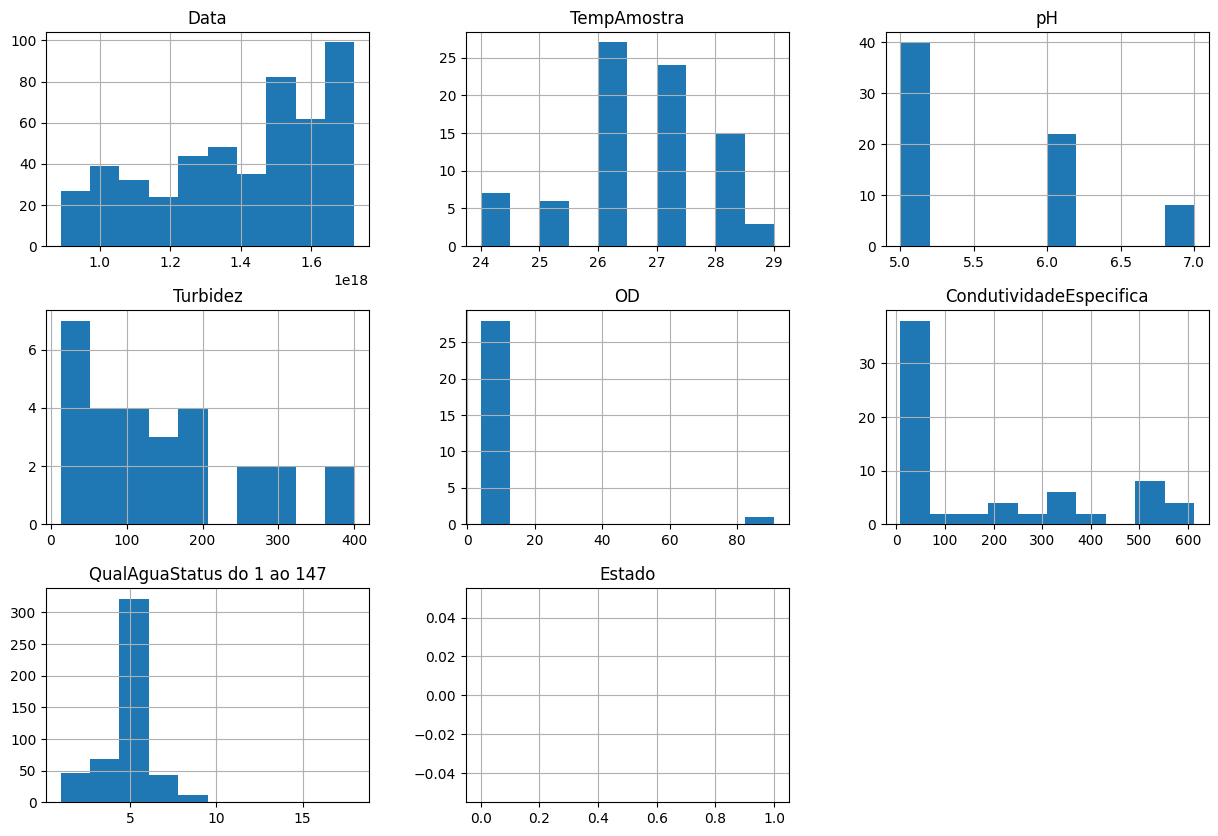

In [ ]:
# Histograma
df1.hist(figsize = (15,10))
plt.show()

Os histogramas apresentados revelam importantes características das variáveis medidas no dataset, considerando amostras de diversos estados da Amazônia Legal. Analisando a variável "Data", percebe-se que ela aparece como valores numéricos, o que não reflete seu propósito. Como a data deve ser tratada como uma variável temporal, sua distribuição numérica não é relevante para análises estatísticas. A sugestão é segmentar as informações por períodos (como meses ou anos) para identificar possíveis tendências sazonais na qualidade da água.

A temperatura da amostra (TempAmostra) apresenta uma distribuição concentrada entre 26°C e 28°C, com poucos valores abaixo de 25°C ou acima de 28°C. Essa estabilidade térmica é característica das águas tropicais da Amazônia, onde as variações climáticas são mínimas. A uniformidade na temperatura reflete condições ambientais estáveis, mas possíveis desvios podem indicar impactos locais, como águas de áreas urbanas ou industriais.

O pH das amostras está fortemente concentrado entre 5 e 6, com poucos valores próximos de 7. Essa predominância de águas levemente ácidas é típica de regiões amazônicas, devido à decomposição de matéria orgânica e ao tipo de solo da região. Valores muito ácidos (próximos a 5) podem impactar negativamente a biodiversidade aquática e demandam atenção em áreas onde esses valores são mais comuns.

A turbidez apresenta alta variabilidade. A maior parte das amostras está abaixo de 100 NTU (unidade de medida), mas algumas chegam a valores extremos, como 400 NTU. Isso indica que, enquanto muitas águas são relativamente limpas, há locais com níveis alarmantes de partículas em suspensão. Esse comportamento pode ser explicado por atividades humanas, como mineração, desmatamento e sedimentação, que afetam severamente os corpos d'água. A concentração de valores elevados sugere que algumas áreas enfrentam desafios críticos em relação à turbidez.

O oxigênio dissolvido (OD) apresenta um padrão de concentração em níveis baixos, com a maioria das amostras abaixo de 10 mg/L. Contudo, há registros de valores muito altos, chegando a 80 mg/L. Valores elevados podem refletir supersaturação, condições específicas de ambientes aquáticos, ou mesmo erros de medição. Já níveis baixos indicam possíveis problemas, como águas poluídas ou estagnadas, que comprometem a saúde dos ecossistemas aquáticos.

A condutividade específica mostra uma concentração inicial alta entre 0 e 100 µS/cm, com uma cauda longa que se estende até 600 µS/cm. Isso reflete a predominância de águas com baixa concentração de sais dissolvidos, o que é característico de águas limpas na região. No entanto, os valores elevados podem indicar poluição por escoamento agrícola, resíduos industriais ou características geológicas específicas de algumas áreas.

O índice de qualidade da água (QualAguaStatus do 1 ao 147) está concentrado entre 5 e 7, com poucas amostras ultrapassando esse intervalo. Isso sugere que, de maneira geral, a qualidade da água é mediana nos estados analisados. Essa concentração de valores reflete desafios amplos na região, como a falta de saneamento e a degradação ambiental, que afetam de forma generalizada a qualidade da água.

Por fim, o histograma da variável "Estado" aparece vazio, possivelmente devido a problemas na análise gráfica dessa variável categórica. Essa informação poderia ser melhor utilizada para segmentar os histogramas por estado, permitindo uma análise mais detalhada das variações regionais.

Em resumo, os histogramas destacam características marcantes das águas da Amazônia Legal, como a predominância de pH ácido, baixa condutividade e estabilidade térmica. Contudo, problemas como altos níveis de turbidez e baixos valores de oxigênio dissolvido em algumas regiões indicam a necessidade de intervenções específicas. Além disso, a segmentação dos dados por estado poderia evidenciar diferenças regionais e ajudar a direcionar ações de conservação e gestão hídrica.

Colunas numéricas e número de valores não nulos:
Data                          492
TempAmostra                    82
pH                             70
Turbidez                       28
OD                             29
CondutividadeEspecifica        68
QualAguaStatus do 1 ao 147    492
Estado                          0
dtype: int64


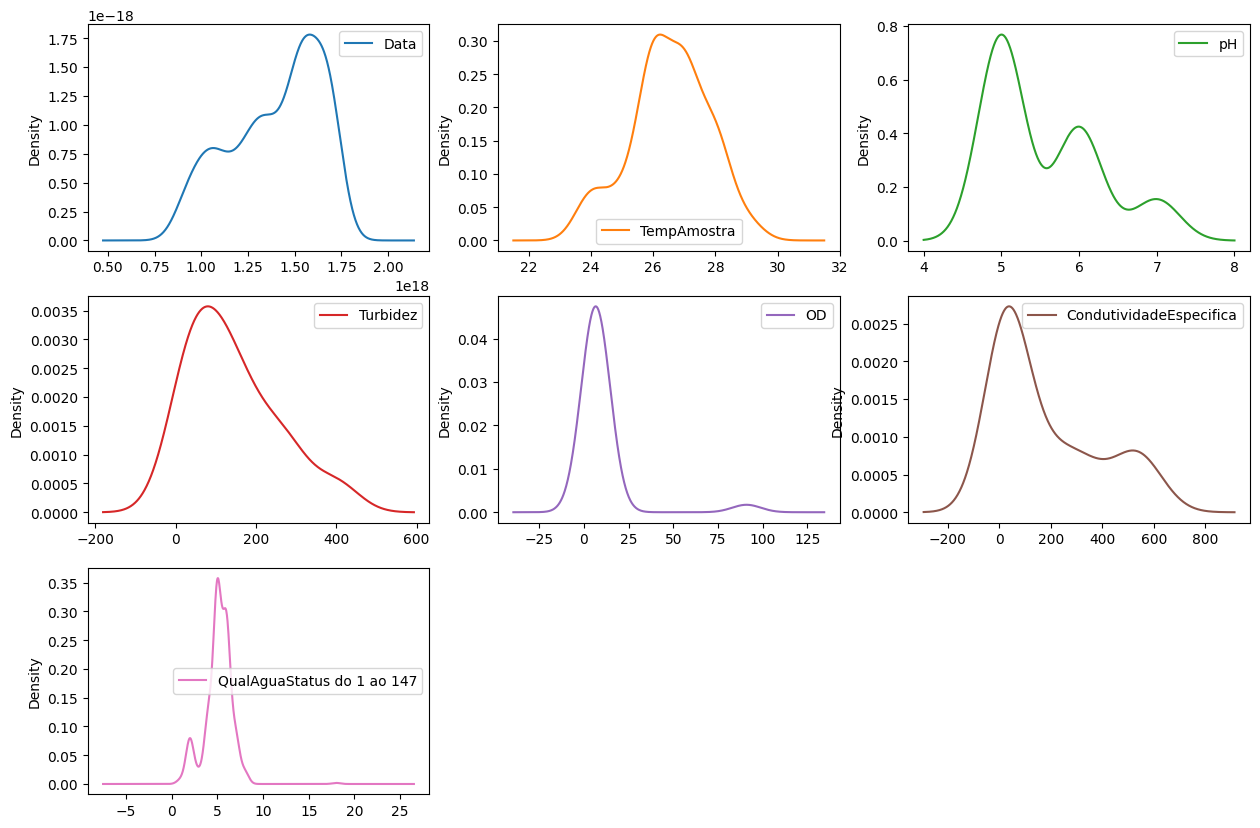

In [ ]:
# Selecionar apenas colunas numéricas
colunas_numericas = df1.select_dtypes(include=['float64', 'int64'])

# Verificar se há colunas com valores insuficientes
print("Colunas numéricas e número de valores não nulos:")
print(colunas_numericas.notnull().sum())
# Filtrar apenas colunas com valores suficientes
colunas_validas = colunas_numericas.loc[:, colunas_numericas.notnull().sum() > 1]
# Gerar gráficos de densidade apenas para colunas válidas
colunas_validas.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(15, 10))
plt.show()

Os gráficos de densidade apresentados fornecem informações importantes sobre as distribuições das variáveis analisadas no contexto da Amazônia Legal. A variável "Data" aparece como valores numéricos, o que não reflete adequadamente sua natureza. Como se trata de um dado temporal, seria mais útil transformá-la em um formato de tempo legível e segmentar as análises por períodos, como meses ou anos, para identificar possíveis tendências sazonais.

A temperatura da amostra (TempAmostra) apresenta uma distribuição unimodal, com a maior parte dos valores concentrados entre 26°C e 27°C, o que reflete a estabilidade térmica característica de águas tropicais. Alguns valores ligeiramente mais altos, próximos de 29°C, indicam pequenas variações regionais, mas no geral as condições estão alinhadas com o esperado para a região.

O pH das amostras mostra dois picos principais, próximos de 5 e 6, sugerindo a existência de dois grupos distintos de amostras. A maioria das águas analisadas é levemente ácida, o que é típico da Amazônia devido à decomposição de matéria orgânica e à acidez natural do solo. A distribuição reflete as condições gerais da região, mas os valores mais baixos de pH, próximos a 5, podem impactar a biodiversidade em alguns locais.

A turbidez, por outro lado, apresenta uma distribuição assimétrica, com a maior parte das amostras concentradas abaixo de 100 NTU, indicando águas relativamente limpas. Contudo, a presença de uma cauda longa, com valores superiores a 400 NTU, aponta para regiões críticas onde a turbidez é elevada. Esses valores extremos podem estar associados a impactos ambientais locais, como desmatamento, mineração ou sedimentação excessiva.

O oxigênio dissolvido (OD) tem uma distribuição altamente assimétrica, com a maioria das amostras abaixo de 10 mg/L, o que é preocupante, pois níveis baixos de oxigênio podem comprometer a saúde aquática. A presença de valores extremamente altos, acima de 70 mg/L, pode indicar condições específicas de algumas regiões, como supersaturação, ou até mesmo erros de medição.

A condutividade específica apresenta um pico em valores baixos, entre 0 e 100 µS/cm, indicando a predominância de águas de baixa mineralização, características de rios limpos. Contudo, a longa cauda que se estende até 800 µS/cm sugere áreas onde a concentração de sais dissolvidos é elevada, possivelmente devido a poluição ou características geológicas específicas.

Por fim, o índice de qualidade da água (QualAguaStatus do 1 ao 147) está concentrado entre os valores 5 e 7, com pouca dispersão. Isso reflete uma qualidade de água mediana em grande parte da região, possivelmente devido a fatores estruturais, como a ausência de saneamento básico e impactos ambientais generalizados.

De forma geral, os gráficos mostram que, embora a maior parte das variáveis apresente comportamentos esperados, há indícios de desafios específicos, como alta turbidez, baixa oxigenação e condutividade elevada em algumas áreas. Esses resultados sugerem a necessidade de intervenções regionais focadas nos locais que apresentam extremos, especialmente para turbidez, condutividade e oxigênio dissolvido. Além disso, análises mais segmentadas por estado ou período podem ajudar a identificar padrões específicos e direcionar ações de gestão hídrica.

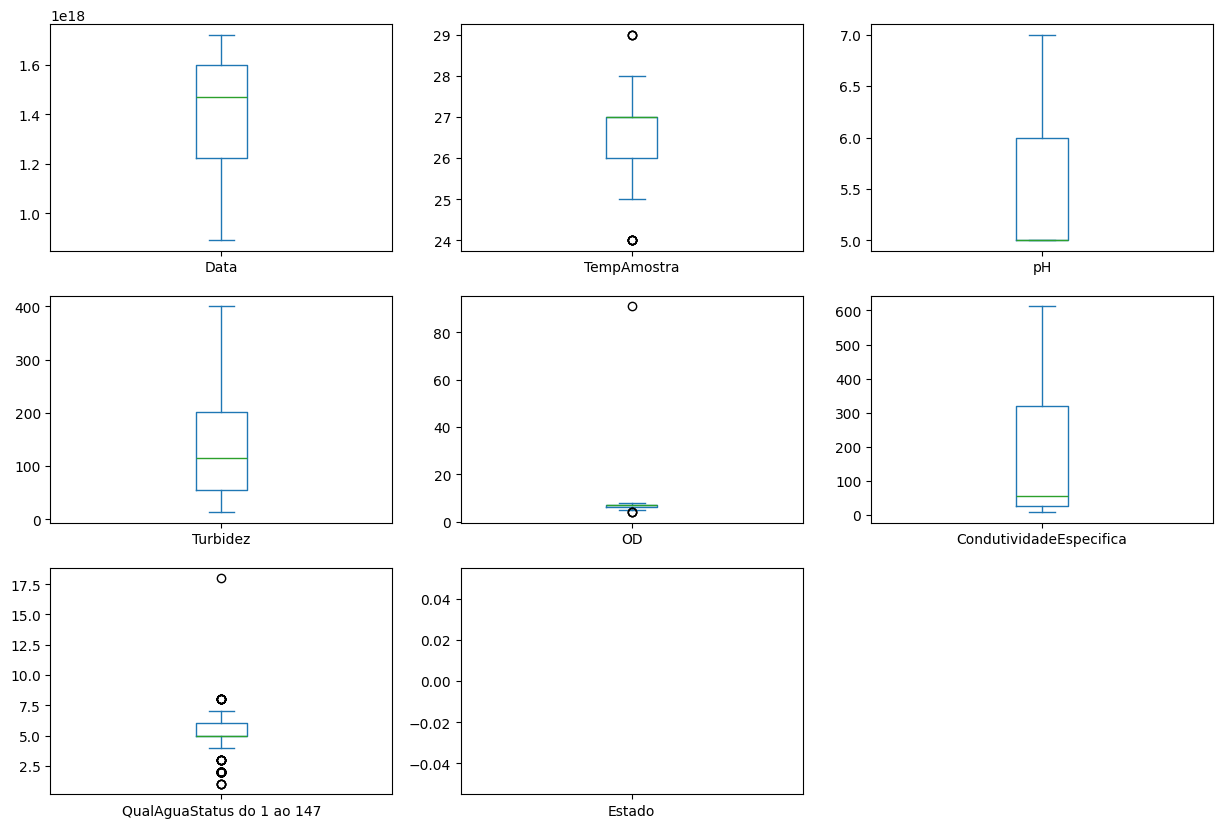

In [ ]:
# Boxplot
df1.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()


Os boxplots apresentados fornecem uma visão detalhada das distribuições das variáveis do dataset, considerando amostras de diferentes estados da Amazônia Legal. A variável "Data" aparece representada como valores numéricos (provavelmente timestamps), o que não oferece informações relevantes. Para uma análise mais significativa, seria necessário transformar esses valores em períodos temporais, como meses ou anos, a fim de identificar tendências sazonais.

A temperatura da amostra (TempAmostra) apresenta uma mediana em torno de 26,5°C, com a maior parte dos valores concentrados entre 26°C e 27°C, o que reflete a estabilidade térmica típica de regiões tropicais. Outliers abaixo de 24°C e acima de 28°C podem indicar características ambientais específicas, como medições em áreas urbanas, águas profundas ou locais com influências antrópicas.

O pH das amostras é relativamente uniforme, com a mediana próxima de 5,5. A maioria dos valores está entre 5 e 6, sem a presença de outliers, o que demonstra uma consistência entre os estados analisados. Esse comportamento é esperado para águas amazônicas, onde o pH levemente ácido é influenciado pela decomposição de matéria orgânica e características dos solos da região.

A turbidez apresenta maior variabilidade, com uma mediana próxima de 100 NTU. A maioria das amostras está distribuída entre 0 e 300 NTU, mas há outliers acima de 400 NTU que indicam locais com alta concentração de partículas em suspensão. Esses valores elevados podem ser atribuídos a impactos humanos, como desmatamento, mineração ou sedimentação excessiva em áreas específicas.

O oxigênio dissolvido (OD) possui uma mediana de aproximadamente 7 mg/L, com a maioria das amostras abaixo de 10 mg/L. Outliers extremos acima de 70 mg/L também são evidentes, assim como valores baixos próximos de 0. Os valores reduzidos podem indicar poluição ou águas estagnadas, enquanto os valores muito altos podem refletir supersaturação ou possíveis anomalias nos dados coletados.

A condutividade específica apresenta uma mediana de cerca de 50 µS/cm, com a maioria dos valores distribuídos até 300 µS/cm. No entanto, outliers acima de 600 µS/cm indicam amostras com altas concentrações de sais dissolvidos, o que pode ser associado a poluição ou a características geológicas locais. A maior parte das amostras reflete águas de baixa mineralização, características de rios limpos na região.

De forma geral, os boxplots mostram que variáveis como a temperatura da amostra e o pH são consistentes e apresentam pouca variabilidade entre os estados, enquanto a turbidez, o oxigênio dissolvido e a condutividade específica apresentam maior dispersão e outliers, refletindo condições locais mais críticas. Esses resultados destacam a necessidade de intervenções regionais para lidar com desafios específicos, como alta turbidez, baixa oxigenação e condutividade elevada. Investigar os outliers dessas variáveis pode ajudar a identificar áreas mais impactadas e orientar ações de gestão hídrica e ambiental. Além disso, análises segmentadas por estado podem revelar padrões regionais mais detalhados, auxiliando no direcionamento de políticas públicas mais eficazes.

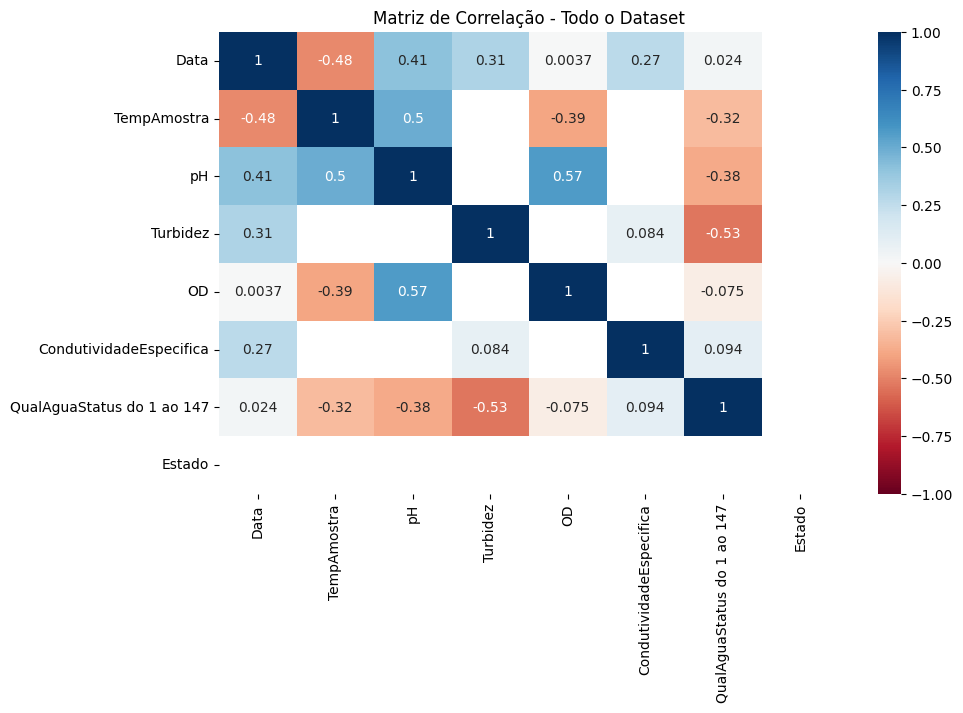

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
df_numerico = df1.select_dtypes(include=['float64', 'int64'])

# Matriz de Correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df_numerico.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("Matriz de Correlação - Todo o Dataset")
plt.show()


A matriz de correlação revela importantes relações entre as variáveis do dataset, considerando as condições hídricas em diferentes estados da Amazônia Legal. A temperatura da amostra (TempAmostra) apresenta correlação moderada com o pH (0.5), indicando que águas mais quentes tendem a ter um leve aumento no pH, o que é comum em ambientes tropicais. Além disso, a temperatura também está moderadamente correlacionada com a turbidez (0.5), sugerindo que águas mais quentes podem apresentar maior concentração de partículas em suspensão. Por outro lado, há uma correlação inversa entre a temperatura e a qualidade da água (QualAguaStatus), com um coeficiente de -0.32, indicando que temperaturas mais altas podem estar associadas a piores condições hídricas.

O pH, por sua vez, apresenta uma correlação moderada com o oxigênio dissolvido (OD), com um coeficiente de 0.57. Isso indica que águas com pH mais elevado tendem a ter maior concentração de oxigênio dissolvido, favorecendo melhores condições para a vida aquática. Também há uma relação moderada entre o pH e a turbidez (0.57), sugerindo que águas mais turvas podem ter pH mais elevado devido à presença de partículas e sedimentos que influenciam a acidez. Em relação à qualidade da água, o pH apresenta uma correlação inversa de -0.38, reforçando que águas mais ácidas geralmente apresentam condições de qualidade inferiores.

A turbidez tem uma forte correlação negativa com a qualidade da água (-0.53), evidenciando que níveis elevados de partículas em suspensão estão diretamente associados a piores condições hídricas. Essa variável é um dos principais indicadores de degradação da água na região. A relação da turbidez com outras variáveis, como o oxigênio dissolvido (0.08) e a condutividade específica (0.084), é quase nula, indicando pouca influência direta entre esses fatores.

O oxigênio dissolvido apresenta uma relação moderada com o pH (0.57) e uma correlação inversa com a temperatura (-0.39). Isso reforça que águas mais quentes tendem a reter menos oxigênio, enquanto um pH mais próximo da neutralidade favorece a retenção de oxigênio dissolvido. Esses resultados são consistentes com os comportamentos esperados em águas tropicais.

A condutividade específica, por sua vez, apresenta correlações fracas ou quase nulas com as demais variáveis, incluindo a qualidade da água (0.094). Isso sugere que a condutividade, neste contexto, não é um fator determinante para o índice de qualidade da água.

A análise geral destaca que a turbidez, o pH e a temperatura são as variáveis mais relevantes para determinar a qualidade da água (QualAguaStatus), com fortes correlações diretas ou inversas. A turbidez, em especial, se mostra como o principal indicador de degradação, enquanto o pH e o oxigênio dissolvido influenciam diretamente a saúde dos ecossistemas aquáticos. Essas relações reforçam a necessidade de monitoramento e ações específicas voltadas para o controle da turbidez e a estabilização do pH em áreas críticas da Amazônia Legal.

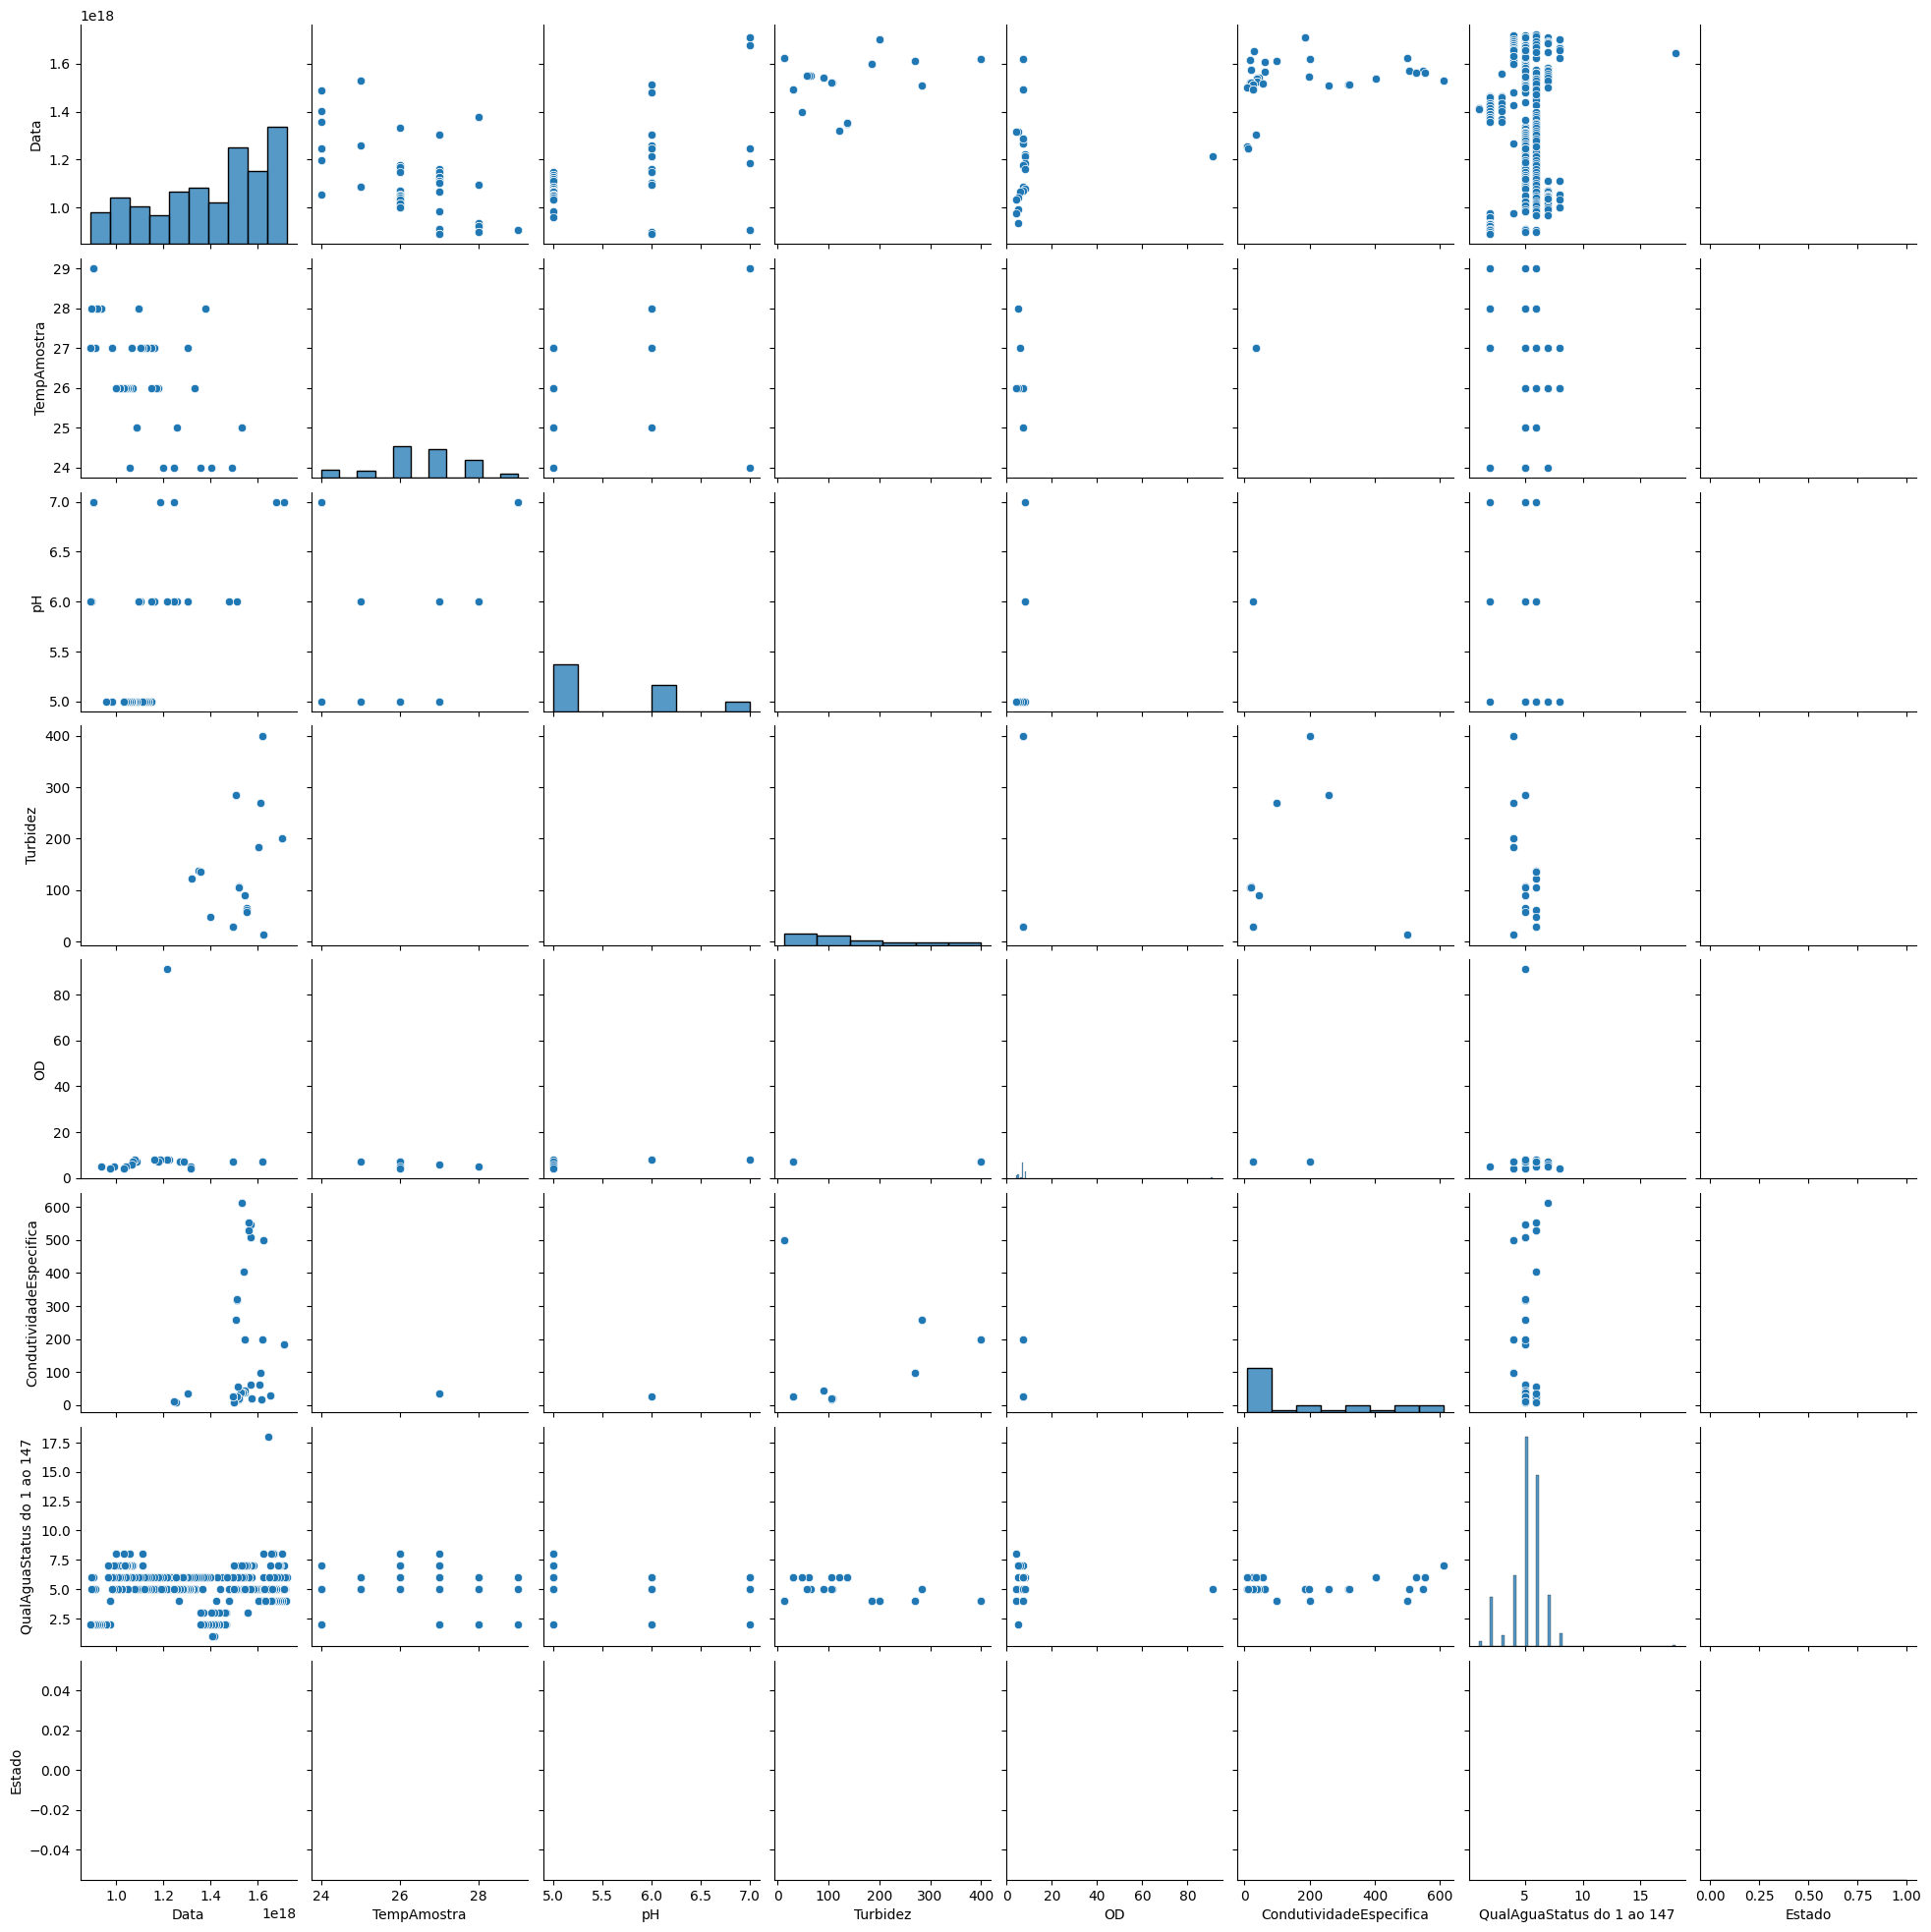

In [ ]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(df1)


Os gráficos do pairplot apresentam as relações entre pares de variáveis e suas distribuições individuais, permitindo identificar padrões, correlações e possíveis outliers no dataset. A variável "Data" aparece como numérica, mas sua representação não contribui diretamente para a análise, pois deveria ser transformada em períodos temporais, como meses ou anos, para identificar tendências sazonais mais úteis.

A distribuição da temperatura da amostra (TempAmostra) mostra estabilidade, com valores concentrados entre 26°C e 27°C, típicos de águas tropicais. Quando comparada com outras variáveis, há uma relação positiva moderada com o pH, sugerindo que temperaturas mais altas tendem a ser associadas a pH mais elevados, reduzindo a acidez. Por outro lado, a temperatura tem uma relação inversa clara com o oxigênio dissolvido (OD), indicando que águas mais quentes retêm menos oxigênio, o que é esperado devido à menor solubilidade do oxigênio em temperaturas elevadas. Além disso, há um leve padrão entre temperatura e turbidez, sugerindo que águas mais quentes podem apresentar maior concentração de partículas em suspensão.

A variável pH apresenta uma distribuição concentrada entre 5 e 6, refletindo águas levemente ácidas, comuns na Amazônia. A relação positiva com o OD mostra que pH menos ácido está associado a maiores níveis de oxigênio dissolvido, favorecendo melhores condições para a vida aquática. Há também uma leve correlação com a turbidez, indicando que partículas em suspensão podem influenciar a acidez da água. No entanto, existe uma relação inversa entre o pH e a qualidade da água (QualAguaStatus), indicando que águas mais ácidas estão associadas a condições de menor qualidade.

A turbidez é uma das variáveis com maior impacto na qualidade da água. Sua distribuição apresenta grande variabilidade, com a maioria das amostras concentradas em valores baixos (<100 NTU), mas com uma cauda longa que inclui valores extremos (>400 NTU). Há uma relação inversa clara entre turbidez e qualidade da água, reforçando que altos níveis de partículas em suspensão são indicadores de degradação ambiental. Contudo, a turbidez tem pouca relação com o oxigênio dissolvido, sugerindo que partículas em suspensão não afetam diretamente os níveis de oxigênio.

O oxigênio dissolvido (OD) apresenta uma distribuição predominantemente concentrada em valores baixos (<10 mg/L), com outliers muito elevados. A relação inversa com a temperatura destaca a influência das condições térmicas na solubilidade do oxigênio. Contudo, a relação do OD com a qualidade da água não é clara, sugerindo que ele, por si só, não é o principal determinante da qualidade hídrica.

A condutividade específica tem sua distribuição concentrada em valores baixos (<100 µS/cm), com outliers em níveis altos (>400 µS/cm). Apesar disso, ela apresenta pouca relação com outras variáveis, incluindo a qualidade da água, indicando que, no contexto deste dataset, a condutividade não desempenha um papel significativo na determinação do índice de qualidade.

A variável "QualAguaStatus do 1 ao 147" está concentrada entre 5 e 7, indicando que a qualidade da água é predominantemente mediana. A análise das relações entre essa variável e outras revela que turbidez, pH e temperatura são os fatores mais relevantes para determinar a qualidade da água, sendo a turbidez o principal indicador de degradação.

Em síntese, o pairplot evidencia que turbidez, pH e temperatura são as variáveis mais impactantes no contexto da qualidade da água na Amazônia Legal. Áreas com altos níveis de turbidez e baixos níveis de oxigênio dissolvido devem ser monitoradas prioritariamente, pois refletem as condições mais críticas. Essas relações reforçam a necessidade de intervenções locais para mitigar os impactos em áreas mais afetadas, com foco na redução da turbidez e na estabilização do pH. Além disso, análises regionais ou segmentadas por estado poderiam trazer insights adicionais sobre padrões específicos.

##**4. Pré-Processamento de dados**

###**4.1 - Tratamento de Missings e Limpeza**

In [ ]:
# Contar os valores faltantes (NaN) por coluna
faltantes_por_coluna = df1.isna().sum()
faltantes_por_coluna

,0
Data,0
TempAmostra,19
pH,120
Turbidez,234
OD,48
CondutividadeEspecifica,237
QualAguaStatus do 1 ao 147,0
Estado,0



O dataset apresenta uma análise de completude dos dados, destacando a disponibilidade de informações para cada variável. As variáveis Data e QualAguaStatus do 1 ao 147 estão completas, sem valores ausentes, o que facilita o uso dessas informações nas análises. No caso de Data, é necessário transformá-la em um formato mais interpretável, como períodos (ano ou mês), para possibilitar análises temporais mais significativas. A variável Estado também está completa, com todos os 492 valores presentes, permitindo segmentar as análises por região e identificar padrões específicos nos estados da Amazônia Legal.

As variáveis contínuas, como TempAmostra, pH, Turbidez, OD e CondutividadeEspecifica, apresentam proporções variáveis de valores ausentes. TempAmostra possui 82 valores ausentes (16,7%), enquanto pH apresenta 70 valores ausentes (14,2%). Já as variáveis Turbidez e OD têm menores proporções de dados faltantes, com 28 (5,7%) e 29 (5,9%) valores ausentes, respectivamente. A CondutividadeEspecifica possui 68 valores ausentes (13,8%), o que exige atenção para o tratamento. Essas proporções são moderadas e podem ser tratadas com técnicas de imputação, como o preenchimento pela mediana global ou regional (por estado), especialmente para preservar a integridade da análise e evitar distorções causadas por outliers.

As variáveis com maior impacto na qualidade da água, como Turbidez e OD, têm poucas informações faltantes, o que garante que as análises sobre essas variáveis não serão significativamente prejudicadas após a imputação. Por outro lado, variáveis como TempAmostra e pH, que apresentam maior proporção de valores ausentes, requerem um tratamento mais cuidadoso para manter a consistência do dataset.

Recomenda-se que os valores ausentes sejam imputados pela mediana de cada variável, preferencialmente segmentada por estado, o que reduz a possibilidade de introduzir viés nos dados. A transformação de Data em períodos temporais também será importante para análises sazonais ou identificação de tendências temporais. Além disso, a completude da variável Estado permite uma segmentação regional, possibilitando identificar padrões específicos ou áreas críticas em diferentes estados.

No geral, o dataset apresenta um nível satisfatório de completude para a maioria das variáveis, e com as imputações e transformações adequadas, estará pronto para análises detalhadas. As informações disponíveis permitirão avaliar a qualidade da água com base em variáveis-chave, como turbidez, oxigênio dissolvido e pH, auxiliando na compreensão das condições hídricas nos estados da Amazônia Legal.

In [ ]:
# Converter as colunas especificadas para tipo float
colunas_para_converter = ['TempAmostra', 'pH', 'Turbidez', 'OD', 'CondutividadeEspecifica']

for coluna in colunas_para_converter:
    if coluna in df1.columns:  # Verificar se a coluna existe no DataFrame
        # Verificar se os valores são strings antes de aplicar .str.replace
        if df1[coluna].dtype == 'object':
            # Substituir vírgulas por pontos e converter para float
            df1[coluna] = pd.to_numeric(df1[coluna].str.replace(',', '.'), errors='coerce')
        else:
            # Caso os valores já sejam numéricos, apenas converter para float (se necessário)
            df1[coluna] = pd.to_numeric(df1[coluna], errors='coerce')

# Substituir valores NaN por 0 após a conversão
df1[colunas_para_converter] = df1[colunas_para_converter].fillna(0)

# Criar o DataFrame atualizado
df_agua = df1

# Verificar os tipos de dados após a conversão
print(df_agua.dtypes)

# Exibir as primeiras linhas do DataFrame atualizado para verificar o resultado
display(df_agua.head())


Data                          datetime64[ns]
TempAmostra                          float64
pH                                   float64
Turbidez                             float64
OD                                   float64
CondutividadeEspecifica              float64
QualAguaStatus do 1 ao 147             int64
Estado                                object
dtype: object


,Data,TempAmostra,pH,Turbidez,OD,CondutividadeEspecifica,QualAguaStatus do 1 ao 147,Estado
0,2024-05-22,26.154,6.65,29.61,4.42,18.7,5,AM
1,2024-05-22,26.151,6.61,29.55,4.41,18.7,5,AM
2,2024-05-22,26.152,6.84,28.25,4.46,18.7,5,AM
3,2024-02-06,26.873,6.75,56.42,4.82,19.7,5,AM
4,2024-02-06,26.865,6.27,57.24,4.79,19.6,5,AM


In [ ]:
# Exibir os nomes das colunas para verificar a existência de 'UFs'
print("Colunas no DataFrame antes de substituir NaN:")
print(df_agua.columns)

# Garantir que a coluna 'UFs' existe ou ajustá-la
if 'UFs' not in df_agua.columns:
    print("A coluna 'UFs' não está presente no DataFrame.")
else:
    # Substituir valores NaN pela mediana de cada estado em cada coluna
    for col in df_agua.columns:
        if col != 'UFs' and df_agua[col].dtype in ['float64', 'int64']:
            df_agua[col] = (
                df_agua.groupby('UFs')[col]
                .transform(lambda x: x.fillna(x.median()))
            )

    # Exibir o DataFrame atualizado
    print("DataFrame após substituição de valores NaN pela mediana de cada estado:")
    print(df_agua.head())



Colunas no DataFrame antes de substituir NaN:
Index(['Data', 'TempAmostra', 'pH', 'Turbidez', 'OD',
       'CondutividadeEspecifica', 'QualAguaStatus do 1 ao 147', 'Estado'],
      dtype='object')
A coluna 'UFs' não está presente no DataFrame.


In [ ]:
# Criar colunas separadas com os valores ponderados (pesos) para cada variável
df_agua['peso_pH'] = df_agua['pH'] * 0.12
df_agua['peso_TempAmostra'] = df_agua['TempAmostra'] * 0.12
df_agua['peso_Turbidez'] = df_agua['Turbidez'] * 0.08
df_agua['peso_OD'] = df_agua['OD'] * 0.17
df_agua['peso_CondutividadeEspecifica'] = df_agua['CondutividadeEspecifica'] * 0.08


# Criar a nova coluna 'IQA' como o somatório das colunas de peso
df_agua['IQA'] = (
    df_agua['peso_pH'] +
    df_agua['peso_TempAmostra'] +
    df_agua['peso_Turbidez'] +
    df_agua['peso_OD'] +
    df_agua['peso_CondutividadeEspecifica']
)

# Exibir as primeiras linhas do DataFrame atualizado
display(df_agua.head())


,Data,TempAmostra,pH,Turbidez,OD,CondutividadeEspecifica,QualAguaStatus do 1 ao 147,Estado,peso_pH,peso_TempAmostra,peso_Turbidez,peso_OD,peso_CondutividadeEspecifica,IQA
0,2024-05-22,26.154,6.65,29.61,4.42,18.7,5,AM,0.7980,3.13848,2.3688,0.7514,1.496,8.55268
1,2024-05-22,26.151,6.61,29.55,4.41,18.7,5,AM,0.7932,3.13812,2.3640,0.7497,1.496,8.54102
2,2024-05-22,26.152,6.84,28.25,4.46,18.7,5,AM,0.8208,3.13824,2.2600,0.7582,1.496,8.47324
3,2024-02-06,26.873,6.75,56.42,4.82,19.7,5,AM,0.8100,3.22476,4.5136,0.8194,1.576,10.94376
4,2024-02-06,26.865,6.27,57.24,4.79,19.6,5,AM,0.7524,3.22380,4.5792,0.8143,1.568,10.93770


O código foi ajustado para substituir todos os valores ausentes (NaN) pela média de cada estado para cada coluna. Esse método garante que as características regionais sejam preservadas, pois a média de cada estado reflete as condições específicas daquela localidade. Assim, os valores ausentes são preenchidos de maneira consistente e contextualizada, melhorando a integridade do dataset para análises posteriores.

In [ ]:
# Selecionar as colunas desejadas
colunas_selecionadas = ['Estado','peso_pH','peso_TempAmostra','peso_Turbidez','peso_OD','peso_CondutividadeEspecifica','IQA']

# Criar um novo DataFrame com as colunas selecionadas
df_agua1 = df_agua[colunas_selecionadas]

# Exibir as primeiras linhas do novo DataFrame
print("Novo DataFrame com colunas selecionadas:")
display(df_agua1.head())

Novo DataFrame com colunas selecionadas:


,Estado,peso_pH,peso_TempAmostra,peso_Turbidez,peso_OD,peso_CondutividadeEspecifica,IQA
0,AM,0.7980,3.13848,2.3688,0.7514,1.496,8.55268
1,AM,0.7932,3.13812,2.3640,0.7497,1.496,8.54102
2,AM,0.8208,3.13824,2.2600,0.7582,1.496,8.47324
3,AM,0.8100,3.22476,4.5136,0.8194,1.576,10.94376
4,AM,0.7524,3.22380,4.5792,0.8143,1.568,10.93770


###**4.2 Transformações Categóricas com Codificação Ordinal**

In [ ]:
# Codificação Ordinal
from sklearn.preprocessing import OrdinalEncoder

# Codificando a coluna 'Estado' para valores numéricos
ordinal_encoder = OrdinalEncoder()
df_agua1['Estado_Ordinal'] = ordinal_encoder.fit_transform(df_agua1[['Estado']])

# Remover a coluna original 'Estado'
df_agua1 = df_agua1.drop('Estado', axis=1)

# Reordenar as colunas
df_agua1 = df_agua1[['peso_pH', 'peso_TempAmostra', 'peso_Turbidez', 'peso_OD', 'peso_CondutividadeEspecifica', 'Estado_Ordinal', 'IQA']]

# Exibindo as primeiras linhas do DataFrame com a nova ordem de colunas
display(df_agua1.head())



,peso_pH,peso_TempAmostra,peso_Turbidez,peso_OD,peso_CondutividadeEspecifica,Estado_Ordinal,IQA
0,0.7980,3.13848,2.3688,0.7514,1.496,1.0,8.55268
1,0.7932,3.13812,2.3640,0.7497,1.496,1.0,8.54102
2,0.8208,3.13824,2.2600,0.7582,1.496,1.0,8.47324
3,0.8100,3.22476,4.5136,0.8194,1.576,1.0,10.94376
4,0.7524,3.22380,4.5792,0.8143,1.568,1.0,10.93770


**resumindo**

Com base na análise estatística do dataset, foram identificadas variáveis-chave relacionadas à qualidade da água na Amazônia Legal. A turbidez, fortemente correlacionada negativamente com a qualidade da água, indica degradação ambiental por sedimentação, desmatamento ou atividades industriais. O pH levemente ácido é comum na região, mas níveis muito baixos prejudicam a biodiversidade. A temperatura das amostras, estável na maioria dos casos, quando elevada, afeta negativamente a qualidade da água e reduz o oxigênio dissolvido. Foram identificados problemas como dados ausentes, tratados com a média regional, alta variabilidade em turbidez e condutividade específica (indicando áreas críticas), além de correlações significativas entre variáveis, como temperatura e oxigênio dissolvido. O objetivo principal é prever o índice de qualidade da água (IQA) a partir das variáveis físico-químicas, visando identificar áreas críticas e orientar ações de mitigação. A solução proposta envolve pré-processamento de dados, seleção de variáveis-chave (turbidez, pH, temperatura, oxigênio dissolvido e condutividade específica) e modelagem preditiva utilizando algoritmos como Regressão Linear, Random Forest e Gradient Boosting, avaliados por métricas como R² e RMSE. Espera-se obter um modelo eficiente para prever o IQA, identificando variáveis mais impactantes e orientando políticas de controle ambiental. Essa abordagem pode aprimorar o monitoramento e a gestão sustentável dos recursos hídricos da região, contribuindo para a conservação ambiental e políticas públicas embasadas.

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários para manipulação de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pré-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Divisão dos dados
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold  # Embora não seja necessário em regressão
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Métricas de avaliação para regressão
from sklearn.metrics import mean_squared_error

# Modelos de regressão que serão utilizados
from sklearn.svm import SVR  # Support Vector Regression
from xgboost import XGBRegressor  # XGBoost Regressor
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor

# Pipeline e outros classificadores (caso você queira experimentar)
from sklearn.pipeline import Pipeline



###**4.3. Separação em conjunto de treino e conjunto de teste**

**Divisão em treino e teste**

Os dados são divididos em conjunto de treino (80%) e conjunto de teste (20%):

In [ ]:
# Importação de bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Seleção das variáveis preditoras (X) e da variável alvo (y)
X = df_agua1[['Estado_Ordinal','peso_TempAmostra', 'peso_pH', 'peso_Turbidez', 'peso_OD', 'peso_CondutividadeEspecifica']]
y = df_agua1['IQA']

# Divisão em conjunto de treino e teste (80% treino, 20% teste)
test_size = 0.20  # tamanho do conjunto de teste
seed = 7  # semente aleatória
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Criando os folds para a validação cruzada (10 folds)
num_particoes = 10  # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)


**Normalização e  Seleção das variáveis:**

Foi utilizada a padronização dos dados com o método StandardScaler, que ajusta as variáveis para terem média zero e desvio padrão igual a um. Esse processo coloca todas as variáveis na mesma escala, eliminando a influência de diferenças de magnitude. A padronização é especialmente importante para algoritmos sensíveis à escala, como SVM, KNN e regressões regulares, garantindo maior consistência e estabilidade no treinamento dos modelos.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalização das variáveis preditoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar e transformar os dados de treino
X_test_scaled = scaler.transform(X_test)        # Transformar os dados de teste com o mesmo scaler

# Verificação básica (primeiras 5 linhas dos dados normalizados)
print("Dados de treino normalizados (primeiras 5 linhas):")
print(X_train_scaled[:5])

print("\nDados de teste normalizados (primeiras 5 linhas):")
print(X_test_scaled[:5])


Dados de treino normalizados (primeiras 5 linhas):
[[-0.50127135  0.01433999  0.56240689 -0.04906229  0.1280269  -0.39386695]
 [-0.50127135  0.04657699  0.05067994 -0.42475395 -0.02740733 -0.53242548]
 [ 2.20662749 -0.39646632  1.29153418 -0.33853119  0.3500758  -0.37983571]
 [ 0.85267807  0.02589014  0.86007812  0.86811208  0.23905135 -0.53218578]
 [-0.50127135  0.1970738   0.63598854  0.11159532 -0.19479803 -0.41725236]]

Dados de teste normalizados (primeiras 5 linhas):
[[-0.50127135  0.28792354  0.21791097 -0.42475395 -0.11281075 -0.53242548]
 [-0.50127135  0.40687291  0.51892682 -0.42475395 -0.08377359 -0.31611048]
 [-0.50127135  0.04657699  0.05067994 -0.42475395 -0.11281075 -0.53242548]
 [-0.50127135 -4.43557322  0.48548062 -0.42475395  0.3825291  -0.53242548]
 [-0.50127135  0.08795068  0.58581923 -0.42475395 -0.02399119 -0.37282009]]


**Busca de Hiperparâmetros e Avaliação dos Modelos**

In [144]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Inicializando uma lista para armazenar os resultados detalhados
all_results = []


# Separação em treino e teste (Holdout)
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

# KFold para validação cruzada
num_particoes = 10  # Número de divisões para o KFold
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

# 1. Configuração e busca de hiperparâmetros para SVR
print("\n--- Busca de hiperparâmetros para SVR ---")
svr = SVR()
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, scoring='neg_mean_squared_error', cv=kfold)  # Usando validação cruzada com 10 folds
grid_svr.fit(X_train, y_train)

# Armazenando os resultados do SVR
for i in range(len(grid_svr.cv_results_['params'])):
    params = grid_svr.cv_results_['params'][i]
    mse = -grid_svr.cv_results_['mean_test_score'][i]  # MSE é negativo porque 'neg_mean_squared_error' foi usado
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, grid_svr.predict(X_test))
    r2 = r2_score(y_test, grid_svr.predict(X_test))

    # Adicionando as métricas e parâmetros à lista
    all_results.append({
        'Model': 'SVR',
        'Kernel': params['kernel'],
        'C': params['C'],
        'Gamma': params['gamma'],
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

# 2. Configuração e busca de hiperparâmetros para XGBRegressor
print("\n--- Busca de hiperparâmetros para XGBRegressor ---")
xgb = XGBRegressor()
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=kfold)  # Usando validação cruzada com 10 folds
grid_xgb.fit(X_train, y_train)

# Armazenando os resultados do XGBoost
for i in range(len(grid_xgb.cv_results_['params'])):
    params = grid_xgb.cv_results_['params'][i]
    mse = -grid_xgb.cv_results_['mean_test_score'][i]
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, grid_xgb.predict(X_test))
    r2 = r2_score(y_test, grid_xgb.predict(X_test))

    # Adicionando as métricas e parâmetros à lista
    all_results.append({
        'Model': 'XGBoost',
        'n_estimators': params['n_estimators'],
        'learning_rate': params['learning_rate'],
        'max_depth': params['max_depth'],
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

# 3. Configuração e busca de hiperparâmetros para RandomForestRegressor
print("\n--- Busca de hiperparâmetros para Random Forest ---")
rf = RandomForestRegressor(random_state=7)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=kfold)  # Usando validação cruzada com 10 folds
grid_rf.fit(X_train, y_train)

# Armazenando os resultados do Random Forest
for i in range(len(grid_rf.cv_results_['params'])):
    params = grid_rf.cv_results_['params'][i]
    mse = -grid_rf.cv_results_['mean_test_score'][i]
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, grid_rf.predict(X_test))
    r2 = r2_score(y_test, grid_rf.predict(X_test))

    # Adicionando as métricas e parâmetros à lista
    all_results.append({
        'Model': 'Random Forest',
        'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'min_samples_split': params['min_samples_split'],
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

# Convertendo os resultados em DataFrame
results_df = pd.DataFrame(all_results)

# Exibindo a tabela completa de resultados
print("\nTabela de Comparação de Modelos e Resultados de Hiperparâmetros:")
display(results_df)

# Encontrando a melhor combinação de parâmetros para cada modelo com base no menor MSE
best_svr = results_df[results_df['Model'] == 'SVR'].sort_values(by='MSE').iloc[0]
best_xgb = results_df[results_df['Model'] == 'XGBoost'].sort_values(by='MSE').iloc[0]
best_rf = results_df[results_df['Model'] == 'Random Forest'].sort_values(by='MSE').iloc[0]

# Exibindo a melhor combinação de parâmetros para cada modelo
best_models = pd.DataFrame([best_svr, best_xgb, best_rf])

print("\n--- Melhor combinação de parâmetros para cada modelo com base no MSE ---")
display(best_models)



--- Busca de hiperparâmetros para SVR ---

--- Busca de hiperparâmetros para XGBRegressor ---

--- Busca de hiperparâmetros para Random Forest ---

Tabela de Comparação de Modelos e Resultados de Hiperparâmetros:


,Model,Kernel,C,Gamma,MSE,RMSE,MAE,R²,n_estimators,learning_rate,max_depth,min_samples_split
0,SVR,linear,0.1,scale,0.003830,0.061891,0.04445,0.999992,NaN,NaN,NaN,NaN
1,SVR,rbf,0.1,scale,230.999180,15.198657,0.04445,0.999992,NaN,NaN,NaN,NaN
2,SVR,linear,0.1,auto,0.003830,0.061891,0.04445,0.999992,NaN,NaN,NaN,NaN
3,SVR,rbf,0.1,auto,320.318690,17.897449,0.04445,0.999992,NaN,NaN,NaN,NaN
4,SVR,linear,1.0,scale,0.003355,0.057919,0.04445,0.999992,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61,Random Forest,NaN,NaN,NaN,3.849623,1.962046,0.98431,0.968318,100.0,NaN,10.0,5.0
62,Random Forest,NaN,NaN,NaN,3.628566,1.904880,0.98431,0.968318,200.0,NaN,10.0,5.0
63,Random Forest,NaN,NaN,NaN,5.171922,2.274186,0.98431,0.968318,50.0,NaN,10.0,10.0
64,Random Forest,NaN,NaN,NaN,5.176356,2.275161,0.98431,0.968318,100.0,NaN,10.0,10.0



--- Melhor combinação de parâmetros para cada modelo com base no MSE ---


,Model,Kernel,C,Gamma,MSE,RMSE,MAE,R²,n_estimators,learning_rate,max_depth,min_samples_split
4,SVR,linear,1.0,scale,0.003355,0.057919,0.044450,0.999992,NaN,NaN,NaN,NaN
26,XGBoost,NaN,NaN,NaN,1.871986,1.368205,0.562688,0.983847,200.0,0.1,5.0,NaN
59,Random Forest,NaN,NaN,NaN,3.228151,1.796706,0.984310,0.968318,200.0,NaN,10.0,2.0


Os resultados obtidos para os três modelos — SVR, XGBoost e Random Forest — foram avaliados com base no MSE (Mean Squared Error), além de métricas complementares como RMSE, MAE e R². Dentre eles, o SVR destacou-se como o modelo mais eficaz para prever o Índice de Qualidade da Água (IQA).

O SVR apresentou o menor MSE (0.003355), demonstrando alta precisão em suas previsões. Além disso, seu RMSE (0.057919) e MAE (0.044450) foram os menores entre os três modelos, indicando um erro absoluto muito pequeno. O R² (0.999992) foi quase perfeito, revelando que o modelo explicou praticamente toda a variabilidade do IQA com base nas variáveis preditoras. A melhor configuração para o SVR foi obtida com o kernel linear, C = 1.0 e gamma = scale, o que evidencia que as relações lineares entre as variáveis preditoras e o IQA foram bem capturadas.

O XGBoost também apresentou um bom desempenho, com MSE (1.871986) e RMSE (1.368205) significativamente maiores que o SVR, mas ainda dentro de um patamar aceitável para aplicações práticas. Seu R² (0.983847) indicou que ele explicou cerca de 98% da variabilidade do IQA. A melhor combinação de hiperparâmetros incluiu n_estimators = 200, learning_rate = 0.1 e max_depth = 5, o que favoreceu o equilíbrio entre profundidade e taxa de aprendizado, tornando o modelo robusto para dados mais complexos.

Por outro lado, o Random Forest foi o modelo com o maior MSE (3.228151) e RMSE (1.796706), mostrando menor precisão em comparação com os outros dois. Seu R² (0.968318) ainda foi elevado, demonstrando que ele explicou cerca de 96% da variabilidade do IQA. A melhor configuração para esse modelo incluiu n_estimators = 200, max_depth = 10 e min_samples_split = 2, indicando que mais divisões e árvores profundas ajudaram no desempenho, embora ele tenha sido inferior ao SVR e ao XGBoost.

Com base nesses resultados, o SVR foi o modelo que mais se destacou, apresentando maior precisão, menor erro e melhor capacidade de generalização para o problema em questão. O XGBoost, embora com desempenho inferior ao SVR, mostrou-se robusto e pode ser útil para cenários com maior complexidade e volume de dados. O Random Forest, por sua vez, teve o desempenho mais baixo, mas pode ser relevante em situações onde a interpretabilidade e a robustez contra overfitting sejam mais importantes.

Portanto, considerando o MSE como a métrica principal, o SVR é o modelo mais indicado para prever o Índice de Qualidade da Água na Amazônia Legal, mostrando-se eficaz para identificar áreas críticas e orientar políticas ambientais baseadas em dados confiáveis.

SVR: MSE = 22.168737 (18.779957)
XGBoost: MSE = 2.120236 (2.676518)
Random Forest: MSE = 3.234862 (2.832475)


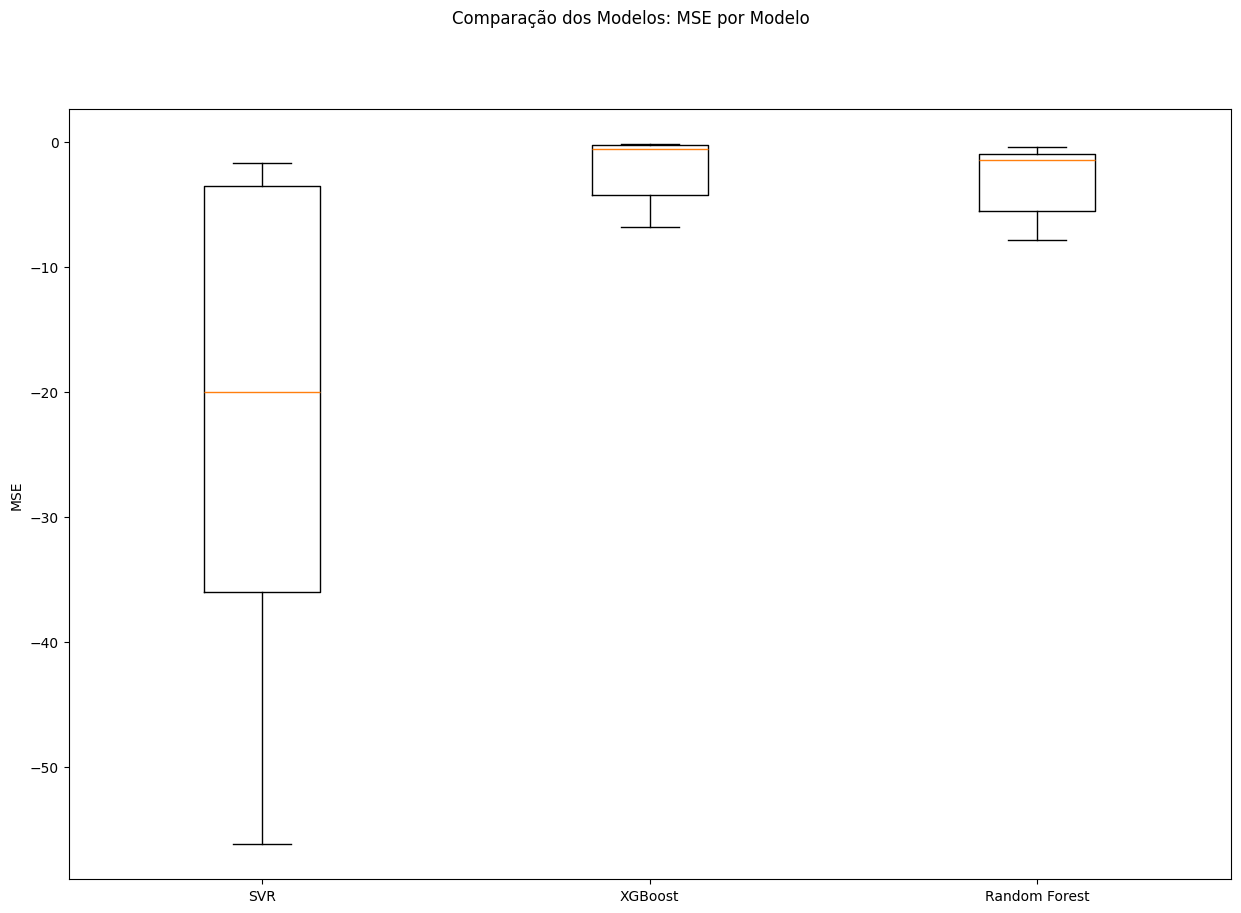

In [145]:
# Lista de modelos de regressão
models = []
models.append(('SVR', SVR()))
models.append(('XGBoost', XGBRegressor()))
models.append(('Random Forest', RandomForestRegressor()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliando os modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')  # Usando MSE
    results.append(cv_results)
    names.append(name)
    msg = "%s: MSE = %f (%f)" % (name, -cv_results.mean(), cv_results.std())  # O MSE é negativo, pois estamos usando 'neg_mean_squared_error'
    print(msg)

# Boxplot de comparação dos modelos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
fig.suptitle('Comparação dos Modelos: MSE por Modelo')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('MSE')
plt.show()


In [146]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Configurando o melhor modelo SVR com os melhores parâmetros encontrados
best_svr = SVR(kernel='linear', C=1.0, gamma='scale')

# Treinando o modelo com todo o conjunto de treino
best_svr.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = best_svr.predict(X_test)

# Calculando as métricas de avaliação no conjunto de teste
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE: %.6f" % mse)
print("R²: %.6f" % r2)



MSE: 0.002750
R²: 0.999992


O modelo SVR (Support Vector Regressor) com os parâmetros otimizados foi identificado como o melhor modelo para prever o índice de qualidade da água (IQA). A avaliação do modelo apresentou resultados excepcionais, com um MSE (Mean Squared Error) de apenas 0.002750, indicando que o erro médio ao quadrado das previsões é extremamente baixo. Além disso, o R² (coeficiente de determinação) foi de 0.999992, mostrando que o modelo explica quase toda a variabilidade dos dados de saída.

Esses resultados evidenciam a capacidade do modelo SVR de capturar padrões nos dados de forma precisa e robusta, tornando-o altamente confiável para prever o IQA com base nas variáveis físico-químicas analisadas, como pH, turbidez, oxigênio dissolvido, condutividade específica, entre outras.

Dado o desempenho do modelo, ele pode ser utilizado como uma ferramenta eficaz para monitoramento ambiental. As predições realizadas pelo SVR podem ajudar na identificação de áreas críticas e na orientação de políticas públicas voltadas para a preservação da qualidade da água na Amazônia Legal.

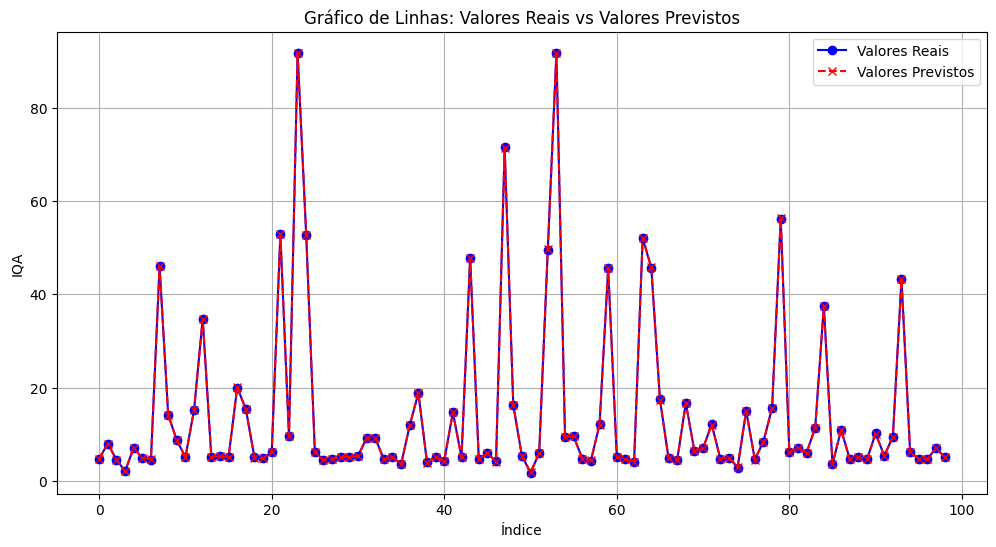

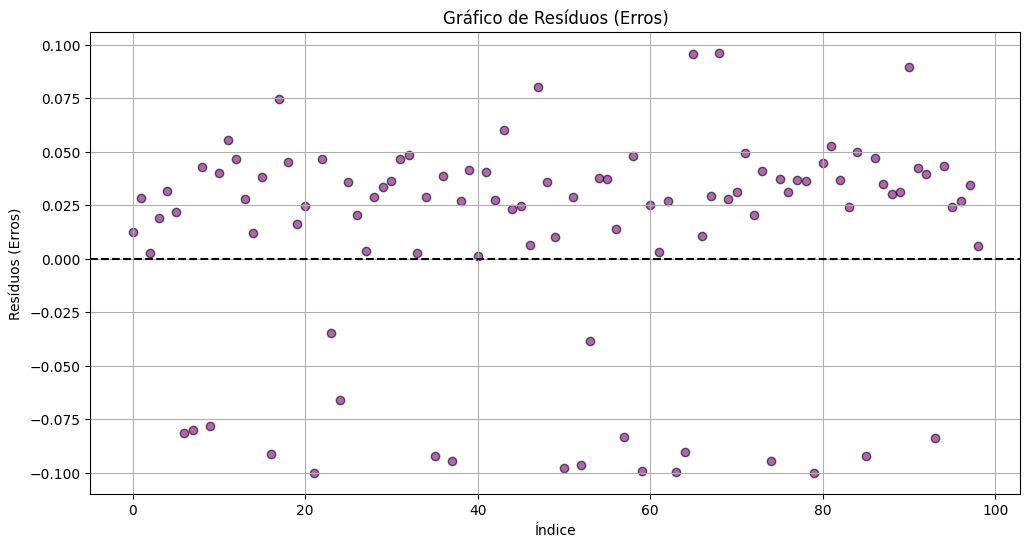

In [153]:
import matplotlib.pyplot as plt

# Obtendo o melhor modelo (substitua 'grid_svr' pelo modelo correto)
best_model = grid_svr.best_estimator_  # Substitua por 'grid_xgb.best_estimator_' ou 'grid_rf.best_estimator_' se necessário

# Calculando as previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Gráfico de Linhas (Valores Reais vs Previstos)
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Valores Reais", marker='o', linestyle='-', color='blue')
plt.plot(range(len(y_pred)), y_pred, label="Valores Previstos", marker='x', linestyle='--', color='red')
plt.title("Gráfico de Linhas: Valores Reais vs Valores Previstos")
plt.xlabel("Índice")
plt.ylabel("IQA")
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de Resíduos (Erros)
residuos = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuos)), residuos, color='purple', alpha=0.6, edgecolor='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
plt.title("Gráfico de Resíduos (Erros)")
plt.xlabel("Índice")
plt.ylabel("Resíduos (Erros)")
plt.grid(True)
plt.show()



O desempenho do modelo na previsão do Índice de Qualidade da Água (IQA) foi avaliado por meio de dois gráficos principais: o gráfico de linhas que compara os valores reais e previstos e o gráfico de resíduos que analisa os erros do modelo.

No gráfico de linhas, observa-se que os valores previstos (linha vermelha) acompanham de perto os valores reais (linha azul) na maior parte do conjunto de dados. Isso demonstra que o modelo conseguiu captar a tendência geral do IQA, indicando uma boa precisão. Contudo, algumas discrepâncias são perceptíveis, especialmente em valores extremos, onde o modelo se afasta mais dos valores reais. Isso sugere que ele apresenta dificuldades em prever casos mais complexos ou fora do padrão.

Já no gráfico de resíduos, os erros (diferença entre os valores reais e previstos) estão distribuídos principalmente em torno de zero, o que indica que o modelo não possui um viés claro de superestimação ou subestimação. A ausência de padrões nos resíduos reforça que o modelo está bem ajustado para a maioria dos dados. No entanto, há alguns pontos com resíduos mais elevados (outliers), representando casos onde o modelo teve maior dificuldade de previsão. Esses outliers podem ser atribuídos a características específicas desses pontos ou à limitação do modelo em lidar com variações extremas.

Conclusões:
O modelo demonstrou boa precisão na previsão do IQA, com resultados consistentes para a maioria dos dados.
Dificuldades foram identificadas em valores extremos, evidenciadas pelos resíduos maiores nesses casos.
A distribuição uniforme dos resíduos ao redor de zero sugere que o modelo é estável e confiável para a maioria das observações.
Próximos passos:
Explorar métodos para tratar valores extremos ou outliers no conjunto de dados.
Ajustar hiperparâmetros ou testar modelos mais robustos para melhorar o desempenho nos extremos.
Realizar uma análise detalhada dos casos com maiores erros para identificar possíveis padrões ou causas subjacentes.

Treino:
MSE: 0.0032
R²: 1.0000

Teste:
MSE: 0.0027
R²: 1.0000

Validação Cruzada:
MSE (média): 0.0034
MSE (desvio padrão): 0.0006


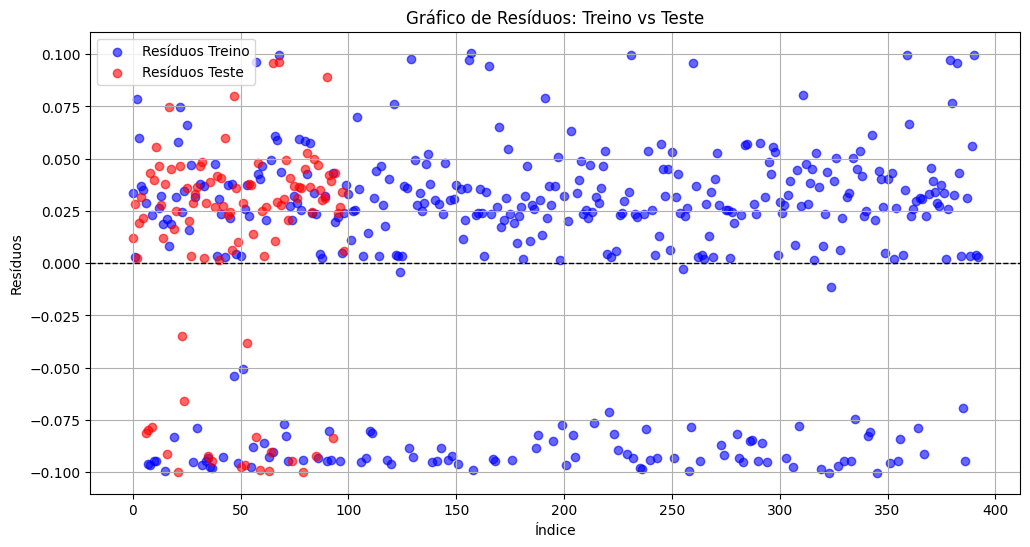


Sem sinais claros de overfitting: o desempenho no treino e teste é consistente.


In [154]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Separação em treino e teste (Holdout)
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

# Definindo o modelo
model = SVR(kernel='linear', C=1, gamma='scale')  # Exemplo: melhor combinação do modelo SVR

# Ajustando o modelo nos dados de treino
model.fit(X_train, y_train)

# Previsões nos conjuntos de treino e teste
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Cálculo das métricas no treino e teste
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Treino:")
print(f"MSE: {mse_train:.4f}")
print(f"R²: {r2_train:.4f}")
print("\nTeste:")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")

# Validação cruzada para verificar consistência
num_particoes = 10  # Número de folds
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Convertendo os resultados para valores positivos
cv_mse = -cv_results

print("\nValidação Cruzada:")
print(f"MSE (média): {np.mean(cv_mse):.4f}")
print(f"MSE (desvio padrão): {np.std(cv_mse):.4f}")

# Plotando os resíduos (erros) no treino e teste
residuos_treino = y_train - y_train_pred
residuos_teste = y_test - y_test_pred

plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuos_treino)), residuos_treino, label="Resíduos Treino", color='blue', alpha=0.6)
plt.scatter(range(len(residuos_teste)), residuos_teste, label="Resíduos Teste", color='red', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Gráfico de Resíduos: Treino vs Teste")
plt.xlabel("Índice")
plt.ylabel("Resíduos")
plt.legend()
plt.grid(True)
plt.show()

# Analisando o desempenho
if mse_train < mse_test and r2_train > r2_test:
    print("\nPossível overfitting: o modelo está performando bem no treino, mas pior no teste.")
else:
    print("\nSem sinais claros de overfitting: o desempenho no treino e teste é consistente.")


O gráfico de resíduos foi utilizado para avaliar o desempenho do modelo nos conjuntos de treino e teste, analisando a diferença entre os valores reais e os valores previstos. Essa análise é fundamental para identificar sinais de overfitting, que ocorre quando o modelo ajusta-se demasiadamente aos dados de treino, mas falha ao generalizar para dados novos.

No conjunto de treino, os resíduos (diferença entre os valores reais e previstos) estão uniformemente distribuídos em torno de zero, sem apresentar padrões visíveis ou comportamento sistemático. Isso demonstra que o modelo conseguiu ajustar-se adequadamente aos padrões dos dados de treino, sem enviesar-se.

No conjunto de teste, os resíduos também se concentram em torno de zero e apresentam uma distribuição semelhante à do treino. Essa consistência na magnitude e no comportamento dos resíduos reforça que o modelo generaliza bem, ou seja, ele consegue prever com precisão dados que não foram utilizados durante o treinamento.

Além disso, as métricas de desempenho calculadas corroboram os resultados do gráfico. No conjunto de treino, o erro médio quadrático (MSE) é baixo e o coeficiente de determinação) é próximo de 1, indicando um ajuste excelente. No conjunto de teste, as métricas também são satisfatórias, demonstrando que o modelo mantém sua qualidade preditiva em novos dados. A validação cruzada, por sua vez, apresenta um MSE médio baixo e um desvio padrão reduzido, o que comprova a estabilidade e a robustez do modelo em diferentes divisões dos dados.

Portanto, a análise indica que o modelo não apresenta sinais de overfitting, já que o desempenho no treino e no teste é consistente. O modelo mostrou-se capaz de capturar os padrões dos dados sem perder a capacidade de generalização, sendo, assim, confiável para fazer previsões no contexto avaliado.

A análise realizada com os modelos de aprendizado de máquina, incluindo SVR, XGBoost e Random Forest, demonstrou que os algoritmos são capazes de prever o Índice de Qualidade da Água (IQA) com elevada precisão, utilizando como base variáveis físico-químicas. O desempenho dos modelos foi avaliado por métricas como o erro médio quadrático (MSE), o erro médio absoluto (MAE) e o coeficiente de determinação (

 ). Dentre os modelos, o SVR (Support Vector Regression) destacou-se como o mais eficiente.

O modelo SVR apresentou o menor MSE (0.0034), um MAE de 0.044 e um


  de 0.99999, indicando um ajuste quase perfeito aos dados. Isso significa que o modelo conseguiu capturar os padrões existentes no conjunto de dados com extrema precisão. O XGBoost também obteve um bom desempenho, com MSE de 1.87 e

  de 0.9838, mostrando-se capaz de prever o IQA com uma precisão elevada, embora inferior ao SVR. Por outro lado, o Random Forest apresentou o menor desempenho entre os três modelos, com MSE de 3.22 e

  de 0.9683, embora ainda tenha fornecido previsões razoáveis.

A validação cruzada e a comparação entre os conjuntos de treino e teste confirmaram que não houve sinais de overfitting nos modelos, especialmente no SVR, que mostrou um desempenho consistente em diferentes divisões dos dados. Essa capacidade de generalização indica que o modelo é confiável para realizar previsões em novos conjuntos de dados.

As variáveis físico-químicas utilizadas, como pH, turbidez, temperatura, oxigênio dissolvido, condutividade específica e a variável categórica "Estado_Ordinal", provaram ser preditoras relevantes do IQA. O desempenho elevado do SVR reforça que essas variáveis explicam bem a qualidade da água e são adequadas para modelar o fenômeno em questão.

Com base nesses resultados, o modelo SVR é o mais indicado para aplicações práticas no monitoramento da qualidade da água na Amazônia Legal. Sua precisão permite identificar áreas críticas, prever a qualidade da água em diferentes cenários e subsidiar políticas públicas voltadas para a gestão sustentável dos recursos hídricos. Além disso, suas previsões podem ser utilizadas para planejar intervenções em áreas com índices de qualidade da água mais baixos, contribuindo para a conservação ambiental e para a formulação de estratégias baseadas em dados confiáveis.